# Objetivo

Pronósticar si se realizará la venta o no

In [ ]:
# ATENCIÓN:

# Este cuaderno de jupyter debe ser ejecutado con Spark
# PS C:\sdev> docker run -it --rm -d -p 8888:8888 --name pyspark -v C:\sdev\spark:/home/jovyan jupyter/pyspark-notebook

# En la consola de comando copie el comando docker anterior, cambie la ubicación de ser necesario y ejecute

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1) Basic operation with PySpark
Basado en https://www.guru99.com/pyspark-tutorial.html

In [3]:
from pyspark import SparkContext, SQLContext
from pyspark.sql.session import SparkSession

sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
spark = SparkSession(sc)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/13 02:59:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
21/12/13 02:59:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/usr/local/spark/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
sc.version

'3.2.0'

In [5]:
df = sqlContext.read.format('csv').options(header='true', inferschema='true')\
    .option("delimiter", ";").option("encoding", "ISO-8859-1").load('Datos Fuente para proyecto integrador.csv')
df.rdd.take(3)
#df.rdd.collect()

[Row(ID Cólegio=5, Colegio='I.E.P NUESTRA SEÑORA DE MONSERRAT', Adopción en Soles='19,707.20', Ventas='SI', Ventas en Soles='12,458.89', % no Compra=0.3678, Asesorías='NO', Costo de Asesoría=0, Participó en Eventos='SI', Tiene Muestras='SI', Costo de Muestras='895.64', Costo de Producto de Venta='9,219.58', Tipo de Canal='DIRECTO', Tiempo de visitas en días=18, Lugar de Venta='LIMA'),
 Row(ID Cólegio=14, Colegio='INMACULADA CONCEPCION', Adopción en Soles='59,082.87', Ventas='SI', Ventas en Soles='35,306.33', % no Compra=0.402426898, Asesorías='SI', Costo de Asesoría=300, Participó en Eventos='SI', Tiene Muestras='SI', Costo de Muestras='165.11', Costo de Producto de Venta='26,126.69', Tipo de Canal='INDIRECTO', Tiempo de visitas en días=30, Lugar de Venta='PROVINCIAS'),
 Row(ID Cólegio=28, Colegio='NUESTRA SEÑORA DE LA MERCED', Adopción en Soles='51,169.50', Ventas='SI', Ventas en Soles='29,907.83', % no Compra=0.415514459, Asesorías='NO', Costo de Asesoría=0, Participó en Eventos='SI'

In [7]:
# Feature selection
COLUMNS = ['Adopción en Soles', 'Ventas',
       'Ventas en Soles', '% no Compra', 'Asesorías', 'Costo de Asesoría',
       'Participó en Eventos', 'Tiene Muestras', 'Costo de Muestras',
       'Costo de Producto de Venta', 'Tipo de Canal',
       'Tiempo de visitas en días', 'Lugar de Venta']

COLUMNS = ['Ventas',
       'Asesorías', 
       'Participó en Eventos', 'Tiene Muestras', 
       'Tipo de Canal',
       'Tiempo de visitas en días', 'Lugar de Venta']

In [8]:
#1. Preparación de datos

df2=df.select(COLUMNS)
df2.show()

+------+---------+--------------------+--------------+-------------+-------------------------+--------------+
|Ventas|Asesorías|Participó en Eventos|Tiene Muestras|Tipo de Canal|Tiempo de visitas en días|Lugar de Venta|
+------+---------+--------------------+--------------+-------------+-------------------------+--------------+
|    SI|       NO|                  SI|            SI|      DIRECTO|                       18|          LIMA|
|    SI|       SI|                  SI|            SI|    INDIRECTO|                       30|    PROVINCIAS|
|    SI|       NO|                  SI|            SI|    INDIRECTO|                       11|    PROVINCIAS|
|    SI|       SI|                  SI|            SI|      DIRECTO|                       24|          LIMA|
|    SI|       SI|                  NO|            SI|    INDIRECTO|                       38|          LIMA|
|    SI|       SI|                  SI|            SI|    INDIRECTO|                        8|    PROVINCIAS|
|    SI|  

In [9]:
df2.printSchema()

root
 |-- Ventas: string (nullable = true)
 |-- Asesorías: string (nullable = true)
 |-- Participó en Eventos: string (nullable = true)
 |-- Tiene Muestras: string (nullable = true)
 |-- Tipo de Canal: string (nullable = true)
 |-- Tiempo de visitas en días: integer (nullable = true)
 |-- Lugar de Venta: string (nullable = true)



In [10]:
df2.describe().show()

+-------+------+---------+--------------------+--------------+-------------+-------------------------+--------------+
|summary|Ventas|Asesorías|Participó en Eventos|Tiene Muestras|Tipo de Canal|Tiempo de visitas en días|Lugar de Venta|
+-------+------+---------+--------------------+--------------+-------------+-------------------------+--------------+
|  count|   428|      428|                 428|           428|          428|                      428|           428|
|   mean|  null|     null|                null|          null|         null|       13.460280373831775|          null|
| stddev|  null|     null|                null|          null|         null|       19.480508769928413|          null|
|    min|    NO|       NO|                  NO|            NO|      DIRECTO|                        0|          LIMA|
|    max|    SI|       SI|                  SI|            SI|    INDIRECTO|                      150|    PROVINCIAS|
+-------+------+---------+--------------------+---------

In [11]:
df2.groupBy("Ventas").count().show()

+------+-----+
|Ventas|count|
+------+-----+
|    SI|  408|
|    NO|   20|
+------+-----+



In [12]:
df2.groupBy("Tiempo de visitas en días").count().show()

+-------------------------+-----+
|Tiempo de visitas en días|count|
+-------------------------+-----+
|                       31|    3|
|                       53|    1|
|                       34|    1|
|                       28|    8|
|                       27|    2|
|                       26|    2|
|                       44|    1|
|                       12|    9|
|                       22|    9|
|                       47|    1|
|                        1|   36|
|                       52|    1|
|                       13|   11|
|                        6|   16|
|                       16|    7|
|                        3|   25|
|                       20|    5|
|                       40|    2|
|                       94|    1|
|                       54|    1|
+-------------------------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='Ventas', ylabel='count'>

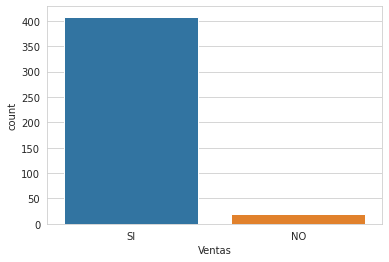

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Ventas',data=df2.toPandas())

<AxesSubplot:xlabel='Ventas', ylabel='Tiempo de visitas en días'>

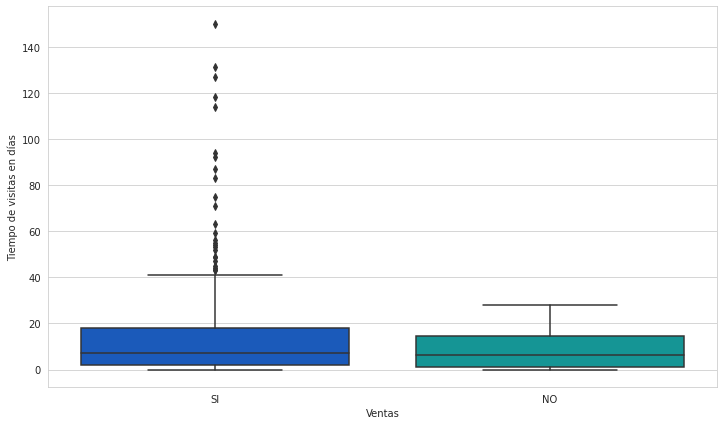

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Ventas',y='Tiempo de visitas en días',data=df2.toPandas(),palette='winter')

In [15]:
# Crosstab computation
df2.crosstab('Tiempo de visitas en días', 'Ventas').sort("Tiempo de visitas en días_Ventas").show()

+--------------------------------+---+---+
|Tiempo de visitas en días_Ventas| NO| SI|
+--------------------------------+---+---+
|                               0|  3| 51|
|                               1|  3| 33|
|                              10|  0| 10|
|                              11|  0| 12|
|                             114|  0|  1|
|                             118|  0|  1|
|                              12|  0|  9|
|                             127|  0|  1|
|                              13|  2|  9|
|                             131|  0|  1|
|                              14|  1|  6|
|                              15|  0|  6|
|                             150|  0|  1|
|                              16|  1|  6|
|                              17|  0|  6|
|                              18|  1|  6|
|                              19|  0|  3|
|                               2|  2| 28|
|                              20|  1|  4|
|                              21|  0|  8|
+----------

In [16]:
# Descriptive statistics by group
df2.groupby('Ventas').agg({'Tiempo de visitas en días': 'mean'}).show()

+------+------------------------------+
|Ventas|avg(Tiempo de visitas en días)|
+------+------------------------------+
|    SI|            13.676470588235293|
|    NO|                          9.05|
+------+------------------------------+



# Step 2) Data preprocessing

In [17]:
# la data está OK
# Sólo falta el balaceo

In [18]:
X = df2.toPandas().filter(items=['Asesorías', 
       'Participó en Eventos', 'Tiene Muestras', 
       'Tipo de Canal',
       'Tiempo de visitas en días', 'Lugar de Venta'])
y = df2.toPandas().filter(items=['Ventas'])
y2=y
X2=X

In [19]:
import numpy as np
import pandas as pd

In [20]:
print('TARGET unique:\n', np.unique(y['Ventas']))
var_ord_map = {'NO': 0, 'SI': 1}
y2['ventas_i'] = y['Ventas'].map(var_ord_map)
#y2=y2.drop(['Ventas'], axis = 1) 
y2.head()

TARGET unique:
 ['NO' 'SI']


,Ventas,ventas_i
0,SI,1
1,SI,1
2,SI,1
3,SI,1
4,SI,1


In [21]:
# selectecting cols numeric
y_num=y2[['ventas_i']] 
y_num.head()

,ventas_i
0,1
1,1
2,1
3,1
4,1


In [22]:
#Asesorías	Participó en Eventos	Tiene Muestras	Tipo de Canal	Lugar de Venta

In [23]:
X2['Asesorías'].value_counts()
categor_cols=['Tiempo de visitas en días']

In [24]:
x_order_maping = {'NO': 0, 'SI': 1}
X2['asesorias_i'] = X2['Asesorías'].map(x_order_maping)
categor_cols+=['asesorias_i']
X2.head()

,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta,asesorias_i
0,NO,SI,SI,DIRECTO,18,LIMA,0
1,SI,SI,SI,INDIRECTO,30,PROVINCIAS,1
2,NO,SI,SI,INDIRECTO,11,PROVINCIAS,0
3,SI,SI,SI,DIRECTO,24,LIMA,1
4,SI,NO,SI,INDIRECTO,38,LIMA,1


In [25]:
X2['Participó en Eventos'].value_counts()

SI    247
NO    181
Name: Participó en Eventos, dtype: int64

In [26]:
x_order_maping = {'NO': 0, 'SI': 1}
X2['parti_eventos_i'] = X2['Participó en Eventos'].map(x_order_maping)
categor_cols+=['parti_eventos_i']
X2.head()

,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta,asesorias_i,parti_eventos_i
0,NO,SI,SI,DIRECTO,18,LIMA,0,1
1,SI,SI,SI,INDIRECTO,30,PROVINCIAS,1,1
2,NO,SI,SI,INDIRECTO,11,PROVINCIAS,0,1
3,SI,SI,SI,DIRECTO,24,LIMA,1,1
4,SI,NO,SI,INDIRECTO,38,LIMA,1,0


In [27]:
X2['Tiene Muestras'].value_counts()

SI    227
NO    201
Name: Tiene Muestras, dtype: int64

In [28]:
x_order_maping = {'NO': 0, 'SI': 1}
X2['tiene_muestras_i'] = X2['Tiene Muestras'].map(x_order_maping)
categor_cols+=['tiene_muestras_i']
X2.head()

,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta,asesorias_i,parti_eventos_i,tiene_muestras_i
0,NO,SI,SI,DIRECTO,18,LIMA,0,1,1
1,SI,SI,SI,INDIRECTO,30,PROVINCIAS,1,1,1
2,NO,SI,SI,INDIRECTO,11,PROVINCIAS,0,1,1
3,SI,SI,SI,DIRECTO,24,LIMA,1,1,1
4,SI,NO,SI,INDIRECTO,38,LIMA,1,0,1


In [29]:
X2['Tipo de Canal'].value_counts()

INDIRECTO    244
DIRECTO      184
Name: Tipo de Canal, dtype: int64

In [30]:
x_order_maping = {'INDIRECTO': 0, 'DIRECTO': 1}
X2['tipo_canal_i'] = X2['Tipo de Canal'].map(x_order_maping)
categor_cols+=['tipo_canal_i']
X2.head()

,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta,asesorias_i,parti_eventos_i,tiene_muestras_i,tipo_canal_i
0,NO,SI,SI,DIRECTO,18,LIMA,0,1,1,1
1,SI,SI,SI,INDIRECTO,30,PROVINCIAS,1,1,1,0
2,NO,SI,SI,INDIRECTO,11,PROVINCIAS,0,1,1,0
3,SI,SI,SI,DIRECTO,24,LIMA,1,1,1,1
4,SI,NO,SI,INDIRECTO,38,LIMA,1,0,1,0


In [31]:
X2['Lugar de Venta'].value_counts()

LIMA          279
PROVINCIAS    149
Name: Lugar de Venta, dtype: int64

In [32]:
x_order_maping = {'LIMA': 0, 'PROVINCIAS': 1}
X2['lugar_venta_i'] = X2['Lugar de Venta'].map(x_order_maping)
categor_cols+=['lugar_venta_i']
X2.head()

,Asesorías,Participó en Eventos,Tiene Muestras,Tipo de Canal,Tiempo de visitas en días,Lugar de Venta,asesorias_i,parti_eventos_i,tiene_muestras_i,tipo_canal_i,lugar_venta_i
0,NO,SI,SI,DIRECTO,18,LIMA,0,1,1,1,0
1,SI,SI,SI,INDIRECTO,30,PROVINCIAS,1,1,1,0,1
2,NO,SI,SI,INDIRECTO,11,PROVINCIAS,0,1,1,0,1
3,SI,SI,SI,DIRECTO,24,LIMA,1,1,1,1,0
4,SI,NO,SI,INDIRECTO,38,LIMA,1,0,1,0,0


In [33]:
categor_cols=set(categor_cols) # quitar duplicados
categor_cols

{'Tiempo de visitas en días',
 'asesorias_i',
 'lugar_venta_i',
 'parti_eventos_i',
 'tiene_muestras_i',
 'tipo_canal_i'}

In [34]:
# selectecting cols numeric
X_num=X2[categor_cols] 
X_num

,tiene_muestras_i,parti_eventos_i,tipo_canal_i,asesorias_i,lugar_venta_i,Tiempo de visitas en días
0,1,1,1,0,0,18
1,1,1,0,1,1,30
2,1,1,0,0,1,11
3,1,1,1,1,0,24
4,1,0,0,1,0,38
...,...,...,...,...,...,...
423,1,0,1,0,1,1
424,0,0,0,0,1,0
425,0,0,1,0,0,7
426,0,0,1,0,1,4


In [39]:
!pip install imbalanced-learn

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)

In [40]:
X_smote_num, y_smote_num = sm.fit_resample(X_num, y_num)

In [41]:
data_smotetomek = pd.concat([X_smote_num, y_smote_num], axis=1)
pd.value_counts(data_smotetomek['ventas_i'], sort = True) 

1    408
0    408
Name: ventas_i, dtype: int64

In [42]:
y_smotex = y_smote_num

In [43]:
var_ord_map = {0:'NO', 1:'SI'}
y_smotex['Ventas'] = y_smote_num['ventas_i'].map(var_ord_map)
#y2=y2.drop(['Ventas'], axis = 1) 
y_smotex.head()

,ventas_i,Ventas
0,1,SI
1,1,SI
2,1,SI
3,1,SI
4,1,SI


In [44]:
# selectecting cols numeric
y_smote=y_smotex[['Ventas']] 
y_smote.head()

,Ventas
0,SI
1,SI
2,SI
3,SI
4,SI


In [45]:
y_smote['Ventas'].value_counts()

SI    408
NO    408
Name: Ventas, dtype: int64

In [46]:
X_smotex=X_smote_num
categor_cols=['Tiempo de visitas en días']

In [47]:
x_order_maping = {0:'LIMA', 1:'PROVINCIAS'}
X_smotex['Lugar de Venta'] = X_smote_num['lugar_venta_i'].map(x_order_maping)
categor_cols+=['Lugar de Venta']
X_smotex.head()

,tiene_muestras_i,parti_eventos_i,tipo_canal_i,asesorias_i,lugar_venta_i,Tiempo de visitas en días,Lugar de Venta
0,1,1,1,0,0,18,LIMA
1,1,1,0,1,1,30,PROVINCIAS
2,1,1,0,0,1,11,PROVINCIAS
3,1,1,1,1,0,24,LIMA
4,1,0,0,1,0,38,LIMA


In [48]:
x_order_maping = {0:'INDIRECTO', 1:'DIRECTO'}
X_smotex['Tipo de Canal'] = X_smote_num['tipo_canal_i'].map(x_order_maping)
categor_cols+=['Tipo de Canal']
X_smotex.head()

,tiene_muestras_i,parti_eventos_i,tipo_canal_i,asesorias_i,lugar_venta_i,Tiempo de visitas en días,Lugar de Venta,Tipo de Canal
0,1,1,1,0,0,18,LIMA,DIRECTO
1,1,1,0,1,1,30,PROVINCIAS,INDIRECTO
2,1,1,0,0,1,11,PROVINCIAS,INDIRECTO
3,1,1,1,1,0,24,LIMA,DIRECTO
4,1,0,0,1,0,38,LIMA,INDIRECTO


In [49]:
x_order_maping = {0:'NO', 1:'SI'}
X_smotex['Tiene Muestras'] = X_smote_num['tiene_muestras_i'].map(x_order_maping)
categor_cols+=['Tiene Muestras']
X_smotex.head()

,tiene_muestras_i,parti_eventos_i,tipo_canal_i,asesorias_i,lugar_venta_i,Tiempo de visitas en días,Lugar de Venta,Tipo de Canal,Tiene Muestras
0,1,1,1,0,0,18,LIMA,DIRECTO,SI
1,1,1,0,1,1,30,PROVINCIAS,INDIRECTO,SI
2,1,1,0,0,1,11,PROVINCIAS,INDIRECTO,SI
3,1,1,1,1,0,24,LIMA,DIRECTO,SI
4,1,0,0,1,0,38,LIMA,INDIRECTO,SI


In [50]:
x_order_maping = {0:'NO', 1:'SI'}
X_smotex['Participó en Eventos'] = X_smote_num['parti_eventos_i'].map(x_order_maping)
categor_cols+=['Participó en Eventos']
X_smotex.head()

,tiene_muestras_i,parti_eventos_i,tipo_canal_i,asesorias_i,lugar_venta_i,Tiempo de visitas en días,Lugar de Venta,Tipo de Canal,Tiene Muestras,Participó en Eventos
0,1,1,1,0,0,18,LIMA,DIRECTO,SI,SI
1,1,1,0,1,1,30,PROVINCIAS,INDIRECTO,SI,SI
2,1,1,0,0,1,11,PROVINCIAS,INDIRECTO,SI,SI
3,1,1,1,1,0,24,LIMA,DIRECTO,SI,SI
4,1,0,0,1,0,38,LIMA,INDIRECTO,SI,NO


In [51]:
x_order_maping = {0:'NO', 1:'SI'}
X_smotex['Asesorías'] = X_smote_num['asesorias_i'].map(x_order_maping)
categor_cols+=['Asesorías']
X_smotex.head()

,tiene_muestras_i,parti_eventos_i,tipo_canal_i,asesorias_i,lugar_venta_i,Tiempo de visitas en días,Lugar de Venta,Tipo de Canal,Tiene Muestras,Participó en Eventos,Asesorías
0,1,1,1,0,0,18,LIMA,DIRECTO,SI,SI,NO
1,1,1,0,1,1,30,PROVINCIAS,INDIRECTO,SI,SI,SI
2,1,1,0,0,1,11,PROVINCIAS,INDIRECTO,SI,SI,NO
3,1,1,1,1,0,24,LIMA,DIRECTO,SI,SI,SI
4,1,0,0,1,0,38,LIMA,INDIRECTO,SI,NO,SI


In [52]:
categor_cols=set(categor_cols)
categor_cols

{'Asesorías',
 'Lugar de Venta',
 'Participó en Eventos',
 'Tiempo de visitas en días',
 'Tiene Muestras',
 'Tipo de Canal'}

In [53]:
# selectecting cols categoricos
X_smote=X_smotex[categor_cols] 
X_smote

,Asesorías,Tiene Muestras,Participó en Eventos,Tiempo de visitas en días,Tipo de Canal,Lugar de Venta
0,NO,SI,SI,18,DIRECTO,LIMA
1,SI,SI,SI,30,INDIRECTO,PROVINCIAS
2,NO,SI,SI,11,INDIRECTO,PROVINCIAS
3,SI,SI,SI,24,DIRECTO,LIMA
4,SI,SI,NO,38,INDIRECTO,LIMA
...,...,...,...,...,...,...
811,NO,NO,NO,18,DIRECTO,LIMA
812,NO,NO,NO,19,DIRECTO,LIMA
813,NO,NO,NO,0,DIRECTO,LIMA
814,NO,NO,NO,0,DIRECTO,LIMA


In [54]:
y_smotef=y_smote.rename(columns={'Ventas': 'label'}) # spark trabaja con label para la var dependiente
y_smotef

,label
0,SI
1,SI
2,SI
3,SI
4,SI
...,...
811,NO
812,NO
813,NO
814,NO


In [55]:
#Combine the resampled data into one spark dataframe
df_smote = X_smote.combine_first(y_smotef)
df_smote

,Asesorías,Lugar de Venta,Participó en Eventos,Tiempo de visitas en días,Tiene Muestras,Tipo de Canal,label
0,NO,LIMA,SI,18,SI,DIRECTO,SI
1,SI,PROVINCIAS,SI,30,SI,INDIRECTO,SI
2,NO,PROVINCIAS,SI,11,SI,INDIRECTO,SI
3,SI,LIMA,SI,24,SI,DIRECTO,SI
4,SI,LIMA,NO,38,SI,INDIRECTO,SI
...,...,...,...,...,...,...,...
811,NO,LIMA,NO,18,NO,DIRECTO,NO
812,NO,LIMA,NO,19,NO,DIRECTO,NO
813,NO,LIMA,NO,0,NO,DIRECTO,NO
814,NO,LIMA,NO,0,NO,DIRECTO,NO


In [56]:
#change it back to spark dataframe
df2 = spark.createDataFrame(df_smote)

# Step 3) Build a data processing pipeline

In [57]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
# https://www.guru99.com/pyspark-tutorial.html go to Step 3)

In [58]:
CATE_FEATURES = ['label',
       'Asesorías', 
       'Participó en Eventos', 'Tiene Muestras', 
       'Tipo de Canal',
       'Lugar de Venta']
CONTI_FEATURES  = ['Tiempo de visitas en días']

In [59]:
stages = [] # stages in our Pipeline
for categoricalCol in CATE_FEATURES:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],
                                     outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

In [60]:
# Convert label into label indices using the StringIndexer
label_stringIdx =  StringIndexer(inputCol="label", outputCol="newlabel") # var depend
stages += [label_stringIdx]

In [61]:
assemblerInputs = [c + "classVec" for c in CATE_FEATURES] + CONTI_FEATURES   # vars independientes


In [62]:
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [63]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df2)
model = pipelineModel.transform(df2)

In [64]:
model.take (1)

[Row(Asesorías='NO', Lugar de Venta='LIMA', Participó en Eventos='SI', Tiempo de visitas en días=18, Tiene Muestras='SI', Tipo de Canal='DIRECTO', label='SI', labelIndex=1.0, labelclassVec=SparseVector(1, {}), AsesoríasIndex=0.0, AsesoríasclassVec=SparseVector(1, {0: 1.0}), Participó en EventosIndex=1.0, Participó en EventosclassVec=SparseVector(1, {}), Tiene MuestrasIndex=1.0, Tiene MuestrasclassVec=SparseVector(1, {}), Tipo de CanalIndex=0.0, Tipo de CanalclassVec=SparseVector(1, {0: 1.0}), Lugar de VentaIndex=0.0, Lugar de VentaclassVec=SparseVector(1, {0: 1.0}), newlabel=1.0, features=DenseVector([0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 18.0]))]

In [67]:
from pyspark.ml.linalg import DenseVector
input_data = model.rdd.map(lambda x: (x["newlabel"], DenseVector(x["features"]))) # seleccionamos los datos según spark

In [68]:
input_data

PythonRDD[125] at RDD at PythonRDD.scala:53

In [69]:
df3 = sqlContext.createDataFrame(input_data, ["label", "features"])

In [70]:
df3.show(5) 

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,1.0,0.0,...|
+-----+--------------------+
only showing top 5 rows



## Create a train/test set

In [71]:
#You split the dataset 80/20 with randomSplit.
# Split the data into train and test sets
train_data, test_data = df3.randomSplit([.8,.2],seed=1234)


In [72]:
train_data.groupby('label').agg({'label': 'count'}).show()


+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|         321|
|  1.0|         329|
+-----+------------+



In [74]:
train_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[1.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,1.0,...|
|  1.0|[0.0,0.0,0.0,1.0,...|
|  1.0|[0.0,0.0,0.0,1.0,...|
|  1.0|[0.0,0.0,1.0,0.0,...|
|  1.0|[0.0,0.0,1.0,0.0,...|
|  1.0|[0.0,0.0,1.0,0.0,...|
|  1.0|[0.0,0.0,1.0,1.0,...|
+-----+--------------------+
only showing top 20 rows



In [75]:
test_data.groupby('label').agg({'label': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|          87|
|  1.0|          79|
+-----+------------+



In [76]:
test_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[1.0,1.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,1.0,1.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,1.0,...|
|  1.0|[0.0,1.0,1.0,1.0,...|
|  1.0|[0.0,1.0,1.0,1.0,...|
|  1.0|[0.0,0.0,1.0,0.0,...|
|  1.0|[0.0,0.0,1.0,1.0,...|
|  1.0|[0.0,0.0,1.0,1.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,1.0,1.0,...|
+-----+--------------------+
only showing top 20 rows



# Step 5) Train and evaluate the model


## Clasificardor 1: LogisticRegression

### Modeling

In [77]:

from pyspark.ml.classification import LogisticRegression

# Initialize `lr`
lr = LogisticRegression(labelCol="label",
                        featuresCol="features",
                        maxIter=10,
                        regParam=0.3)

# Fit the data to the model
logModel = lr.fit(train_data)

21/12/13 04:49:50 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
21/12/13 04:49:50 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [79]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(logModel.coefficients))
print("Intercept: " + str(logModel.intercept))

Coefficients: [-1.5529342637104364,-0.5159093344445961,-0.2308856828119655,-0.11571280366319874,-0.8369300236651677,-0.5000213906253016,0.005009574104583872]
Intercept: 2.374202614441741


In [80]:
# Make predictions on test data using the transform() method.
predictions = logModel.transform(test_data)

In [74]:
predictions.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [81]:
selected = predictions.select("label", "prediction", "probability")
selected.show(102)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.73430270490592...|
|  1.0|       1.0|[0.07415908508637...|
|  1.0|       1.0|[0.17834763549272...|
|  1.0|       1.0|[0.12972646556790...|
|  1.0|       1.0|[0.12859951888842...|
|  1.0|       1.0|[0.20128052843934...|
|  1.0|       1.0|[0.20128052843934...|
|  1.0|       1.0|[0.37265366824038...|
|  1.0|       1.0|[0.25033317147482...|
|  1.0|       1.0|[0.45642497997575...|
|  1.0|       1.0|[0.13959826708347...|
|  1.0|       1.0|[0.17761471623960...|
|  1.0|       1.0|[0.21997403072084...|
|  1.0|       1.0|[0.11118293398980...|
|  1.0|       1.0|[0.15790821661521...|
|  1.0|       1.0|[0.26281618400183...|
|  1.0|       1.0|[0.36786657982659...|
|  1.0|       1.0|[0.35744605261702...|
|  1.0|       1.0|[0.32371446003907...|
|  1.0|       1.0|[0.17774025554017...|
|  1.0|       1.0|[0.26665249084600...|
|  0.0|       0.0|[0.61077203794052...|


In [129]:
predictions.select("probability").show(10)

+-----------+
|probability|
+-----------+
|  [1.0,0.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
|  [0.0,1.0]|
+-----------+
only showing top 10 rows



In [128]:
predictions.select("rawPrediction").show(10)

+-------------+
|rawPrediction|
+-------------+
|  [321.0,0.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
|  [0.0,329.0]|
+-------------+
only showing top 10 rows



### Evaluate the model

In [82]:
cm = predictions.select("label", "prediction")

In [83]:
cm.groupby('label').agg({'label': 'count'}).show()


+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|          87|
|  1.0|          79|
+-----+------------+



In [84]:
cm.groupby('prediction').agg({'prediction': 'count'}).show()


+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|               87|
|       1.0|               79|
+----------+-----------------+



In [85]:
cm.filter(cm.label == cm.prediction).count() / cm.count()

1.0

In [86]:
def accuracy_m(model): 
    predictions = model.transform(test_data)
    cm = predictions.select("label", "prediction")
    acc = cm.filter(cm.label == cm.prediction).count() / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100)) 
accuracy_m(model = logModel)

Model accuracy: 100.000%


### ROC metrics
 ToDo

In [87]:
### Use ROC 
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print(evaluator.evaluate(predictions))
print(evaluator.getMetricName())

1.0
areaUnderROC


### Confusion matrix metrics

In [88]:
# 4.3 Evaluation
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))


Accuracy = 1
Test Error = 0


In [89]:
from pyspark.mllib.evaluation import MulticlassMetrics
# Create (prediction, label) pairs
predictionAndLabel = predictions.select("prediction", "label").rdd
# Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel)
print (metrics.confusionMatrix())

/usr/local/spark/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


DenseMatrix([[87.,  0.],
             [ 0., 79.]])


In [90]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred) # ,labels=class_names
cnf_matrix

array([[87,  0],
       [ 0, 79]])

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred )) #, target_names=class_names

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        87
         1.0       1.00      1.00      1.00        79

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



In [93]:
logModel.save("model1/rlmodel")

In [94]:
pipelineModel.save("model1/pipelinemodel")

In [ ]:
#-------- fin ----, pero ---

In [95]:
# en otra pc
from pyspark.ml import PipelineModel

pipeline = PipelineModel.load("model1/pipelinemodel")
## Fit the pipeline to new data
transformeddataset = pipeline.transform(df2)

In [96]:
transformeddataset.take(1)

[Row(Asesorías='NO', Lugar de Venta='LIMA', Participó en Eventos='SI', Tiempo de visitas en días=18, Tiene Muestras='SI', Tipo de Canal='DIRECTO', label='SI', labelIndex=1.0, labelclassVec=SparseVector(1, {}), AsesoríasIndex=0.0, AsesoríasclassVec=SparseVector(1, {0: 1.0}), Participó en EventosIndex=1.0, Participó en EventosclassVec=SparseVector(1, {}), Tiene MuestrasIndex=1.0, Tiene MuestrasclassVec=SparseVector(1, {}), Tipo de CanalIndex=0.0, Tipo de CanalclassVec=SparseVector(1, {0: 1.0}), Lugar de VentaIndex=0.0, Lugar de VentaclassVec=SparseVector(1, {0: 1.0}), newlabel=1.0, features=DenseVector([0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 18.0]))]

In [98]:
from pyspark.ml.classification import LogisticRegressionModel

modelload = LogisticRegressionModel.load("model1/rlmodel")
predictions = modelload.transform(test_data)

In [99]:
selected = predictions.select("label", "prediction", "probability")
selected.show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.73430270490592...|
|  1.0|       1.0|[0.07415908508637...|
|  1.0|       1.0|[0.17834763549272...|
|  1.0|       1.0|[0.12972646556790...|
|  1.0|       1.0|[0.12859951888842...|
|  1.0|       1.0|[0.20128052843934...|
|  1.0|       1.0|[0.20128052843934...|
|  1.0|       1.0|[0.37265366824038...|
|  1.0|       1.0|[0.25033317147482...|
|  1.0|       1.0|[0.45642497997575...|
+-----+----------+--------------------+
only showing top 10 rows



## Clasificardor 2: DecisionTreeClassifier

In [100]:
from pyspark.ml.classification import DecisionTreeClassifier

In [101]:
dtree = DecisionTreeClassifier(labelCol='label', featuresCol='features', maxDepth = 4) # maxDepth =4
# Fit the data to the model
dtreeModel = dtree.fit(train_data)

In [102]:
# Make predictions on test data using the transform() method.
predictions = dtreeModel.transform(test_data)

In [104]:
selected = predictions.select("label", "prediction", "probability")
selected.show(10)

+-----+----------+-----------+
|label|prediction|probability|
+-----+----------+-----------+
|  0.0|       0.0|  [1.0,0.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
+-----+----------+-----------+
only showing top 10 rows



In [105]:
#Evaluate the model
cm = predictions.select("label", "prediction")


In [106]:
cm.groupby('label').agg({'label': 'count'}).show()


+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|          87|
|  1.0|          79|
+-----+------------+



In [107]:
cm.groupby('prediction').agg({'prediction': 'count'}).show()


+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|               87|
|       1.0|               79|
+----------+-----------------+



In [108]:
cm.filter(cm.label == cm.prediction).count() / cm.count()

1.0

In [109]:
accuracy_m(model = dtreeModel)

Model accuracy: 100.000%


In [110]:
# ROC metrics
# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print(evaluator.evaluate(predictions))
print(evaluator.getMetricName())

1.0
areaUnderROC


In [111]:
# Confusion matrix metrics
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 1
Test Error = 0


In [112]:
from pyspark.mllib.evaluation import MulticlassMetrics
# Create (prediction, label) pairs
predictionAndLabel = predictions.select("prediction", "label").rdd
# Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel)
print (metrics.confusionMatrix())

/usr/local/spark/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


DenseMatrix([[87.,  0.],
             [ 0., 79.]])


In [113]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred) # ,labels=class_names
cnf_matrix

array([[87,  0],
       [ 0, 79]])

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred )) #, target_names=class_names

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        87
         1.0       1.00      1.00      1.00        79

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



In [115]:
dtreeModel.save("model2/dtmodel")

In [121]:
from pyspark.ml.classification import DecisionTreeClassificationModel

dtmodelload = DecisionTreeClassificationModel.load("model2/dtmodel")
predictions = dtmodelload.transform(test_data)

In [123]:
selected = predictions.select("label", "prediction", "probability")
selected.show(10)

+-----+----------+-----------+
|label|prediction|probability|
+-----+----------+-----------+
|  0.0|       0.0|  [1.0,0.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
|  1.0|       1.0|  [0.0,1.0]|
+-----+----------+-----------+
only showing top 10 rows



In [126]:
test_data.show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[1.0,1.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,1.0,1.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,0.0,...|
|  1.0|[0.0,1.0,0.0,1.0,...|
|  1.0|[0.0,1.0,1.0,1.0,...|
|  1.0|[0.0,1.0,1.0,1.0,...|
+-----+--------------------+
only showing top 10 rows

